# Lab 5 - EDA with Dimensionality Reduction
### Jackson Rolando

## Part 1 - Load the Data
We'll load the data from JSON files into a Pandas data frame:

In [1]:
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
objects = []
for file in glob.glob('./email_json/*.json'):
    with open(file) as f:
        objects.append(json.load(f))

In [3]:
df = pd.DataFrame(objects)
df.head()

,category,to_address,from_address,subject,body
0,ham,BREAKINGNEWS Subscribers<BREAKINGNEWS-Subscrib...,BREAKING NEWS<breakingnews@foxnews.com>,FNC Alert,"PELOSI, REID SIGN WAR-SPENDING BILL THAT INCLU..."
1,spam,<theorize@plg.uwaterloo.ca>,"""cschai"" <cschai@syhmco.co.kr>",rtfmub,\n\n\n\n\n\n\n\nwyat\nlnpmoqrkhapibcegd\n\n\n\...
2,spam,"""Theorize"" <theorize@plg.uwaterloo.ca>","""Aegis Capital Group LLC"" <Estela.Burch@smapxs...",Invitation to fill in the vacant position of a...,"\n\n\n\nDear sirs,\nAegis Capital Gro..."
3,spam,warwickktwarwic@speedy.uwaterloo.ca,"""shar Nobis"" <sharNobis@autotradebuyer.co.uk>",Terrific gains possible!,http://s6.bilder-hosting.de/img/7LR4W.jpg\nImp...
4,ham,R-help@stat.math.ethz.ch,jessica.gervais@tudor.lu,[R] time serie generation,"\nDear all,\n\nI would like to generate a regu..."


The columns and types are as follows, we've changed the label to a categorical variable:

In [4]:
df.category = df.category.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63542 entries, 0 to 63541
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   category      63542 non-null  category
 1   to_address    63141 non-null  object  
 2   from_address  63542 non-null  object  
 3   subject       63410 non-null  object  
 4   body          63542 non-null  object  
dtypes: category(1), object(4)
memory usage: 2.0+ MB


We'll split our data, and save the files to be restored:

In [5]:
from sklearn.model_selection import train_test_split

data = df.drop(['category'], axis=1)
labels = df['category']

train, test, train_label, test_label = train_test_split(data, labels, test_size=.15)


train.to_json('./data/train_data.json')
test.to_json('./data/test_data.json')
train_label.to_json('./data/train_label.json')
test_label.to_json('./data/test_label.json')

train = pd.read_json('./data/train_data.json')
test = pd.read_json('./data/test_data.json')
train_label = pd.read_json('./data/train_label.json', typ='series')
test_label = pd.read_json('./data/test_label.json', typ='series')

print(train.head())
print(train_label.head())

                           to_address  \
42471   <elaastic@flax9.uwaterloo.ca>   
17776                 jerry@samba.org   
42603             samba-cvs@samba.org   
57690  <avcoopers@flax9.uwaterloo.ca>   
16956   chromatic <chromatic@wgz.org>   

                                      from_address  \
42471  "CMA China Investment" <cma@wsmijrjgcr.net>   
17776  Volker Lendecke <Volker.Lendecke@SerNet.DE>   
42603                                jra@samba.org   
57690            <alert@broadcast.shareholder.com>   
16956          "Matt Diephouse" <mddiep@gmail.com>   

                                                 subject  \
42471           Formation company in Hong Kong and China   
17776  Re: [PATCH] Updated: Implement simple means of...   
42603  svn commit: samba r22574 - in branches: SAMBA_...   
57690               Stock Notification for Netflix, Inc.   
16956            Re: [PATCH] Re-work Parrot_process_args   

                                                    body  
42471  \

## Part 2 - Extract Features


Here we'll convert the message bodies to Bag of Word vectors:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
feat_mat = vectorizer.fit_transform(train.body)

feat_mat.shape

(54010, 275671)

There are 54,010 rows (nonNull entries) and 264,807 columns (different words in the entire corpus). 

We'll inspect the matrix:

In [7]:
print(f'Length of list: {len(list(vectorizer.vocabulary_))}\n')

print('First ten entries:')
first_some_keys = list(vectorizer.vocabulary_)[:10]
for key in first_some_keys:
    print(f'{key}: {vectorizer.vocabulary_[key]}')

print()
def search_word(word):
    index = vectorizer.vocabulary_[word]
    print(f'index of {word}: {index}')
    column = feat_mat[:, index]
    print(f'column for "{word}":\n{column}')
    print(f'shape: {column.shape}')
    print(f'number of occurances: {column.sum()} out of {column.shape[0]} emails.\n')

words_to_search = ["work", "love", "different"]
for word in words_to_search:
    search_word(word)

Length of list: 275671

First ten entries:
15: 45998
信纸: 275593
hong: 144826
kong: 159972
company: 103025
formation: 131531
and: 80508
china: 99361
tax: 242813
currency: 108554

index of work: 266112
column for "work":
  (40, 0)	1
  (41, 0)	1
  (51, 0)	1
  (71, 0)	1
  (74, 0)	1
  (85, 0)	1
  (94, 0)	1
  (100, 0)	1
  (103, 0)	1
  (107, 0)	1
  (116, 0)	1
  (119, 0)	1
  (126, 0)	1
  (146, 0)	1
  (154, 0)	1
  (167, 0)	1
  (171, 0)	1
  (189, 0)	1
  (190, 0)	1
  (198, 0)	1
  (237, 0)	1
  (247, 0)	1
  (267, 0)	1
  (275, 0)	1
  (285, 0)	1
  :	:
  (53789, 0)	1
  (53792, 0)	1
  (53801, 0)	1
  (53808, 0)	1
  (53820, 0)	1
  (53821, 0)	1
  (53823, 0)	1
  (53843, 0)	1
  (53849, 0)	1
  (53854, 0)	1
  (53863, 0)	1
  (53874, 0)	1
  (53877, 0)	1
  (53893, 0)	1
  (53901, 0)	1
  (53919, 0)	1
  (53930, 0)	1
  (53939, 0)	1
  (53942, 0)	1
  (53946, 0)	1
  (53969, 0)	1
  (53976, 0)	1
  (53980, 0)	1
  (53997, 0)	1
  (54005, 0)	1
shape: (54010, 1)
number of occurances: 5557 out of 54010 emails.

index of love: 

## Part 3 - Dimensionality Reduction
We'll combine several columns with high covariance:

In [8]:
from sklearn.decomposition import TruncatedSVD

condenser = TruncatedSVD(n_components=10)
condensed_mat = condenser.fit_transform(feat_mat)

[0.05299109 0.02535154 0.01582448 0.0119804  0.0126446  0.00989303
 0.00973082 0.00904304 0.0073767  0.00723567]


<BarContainer object of 10 artists>

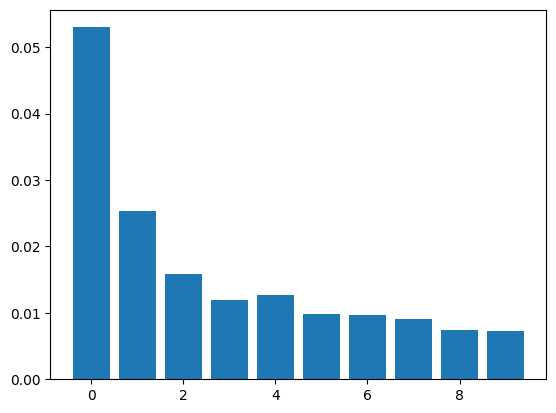

In [9]:
print(condenser.explained_variance_ratio_)
plt.bar(np.arange(condenser.explained_variance_ratio_.size), condenser.explained_variance_ratio_)

The first two components have the highest explained variance ratios, over 50%, meaning they represent most of the variance in the original data. 

## Part 4 - Visualization

We'll plot the components with the highest explained variance:

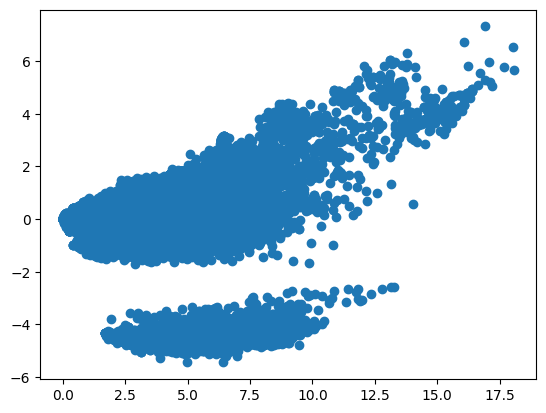

In [10]:
i, j = (0, 1)
plt.scatter(condensed_mat[:, i], condensed_mat[:, j])

Here we'll add labels and color-coding to the mix:

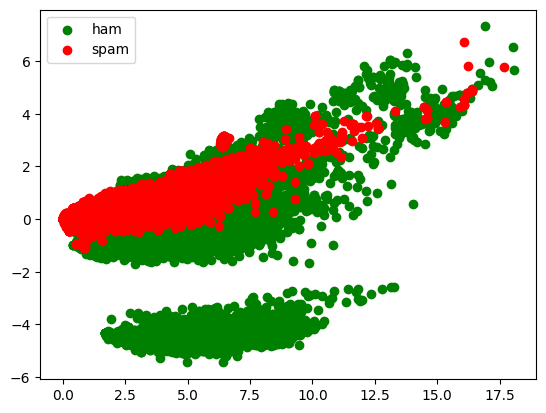

In [11]:
colors = {'ham': 'green', 'spam': 'red'}

fig, ax = plt.subplots()
for label in np.unique(train_label):
    indices = np.where(train_label == label)
    ax.scatter(condensed_mat[indices, i], condensed_mat[indices, j], label=label, c=colors[label])
ax.legend()
plt.show()

## Reflection Questions:
1. Each JSON file has a sender email, a receiver email, a subject, the body of the message, and whether the message was ham or spam. The body is the content of the email, a corpus that we're encoding.
2. 